In [5]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt

In [2]:
#Baixa e importa 'holidays' para acessar datas dos feriados nacionais
#pip install holidays
import holidays
feriados = holidays.Brazil()

In [6]:
#Carrega a planilha de Excel em um dataframe Pandas
df = pd.read_excel(r'C:\Users\hm007677\OneDrive\Odilon Behrens\Ticket Total.xlsm','Tickets Total')

In [7]:
df

,OS,Unidade,Equipamento,Patrimônio,Nome,Abertura,Fechamento,Comentário,Situação,Tempo de OS,...,Tempo de execução,Tempo de espera,Tempo de espera considera Sexta,Auxiliar,Empresa ou Técnico,Mês de abertura,Mês de encerramento,Mês de execução,Sobra do mês,Observação
0,21882.0,CTI - Poli,NaN,NaN,Adalberto,2018-01-01 14:00:26,2018-01-11 08:58:27,CAMA MUKA COM CABO DE ENERGIA COM PINO QUEBRAD...,closed,1900-01-09 18:58:01,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
1,21883.0,Bloco Obstétrico,Doppler Fetal,DM5335,Maurício,2018-01-02 08:15:28,2018-01-11 08:52:42,desconfigurado,closed,1900-01-09 00:37:14,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,21884.0,Odontologia,Cuspideira,000194E,Vânio,2018-01-02 08:33:33,2018-01-11 09:18:09,Intenso vazamento de Ã¡gua na cuspideira da sa...,closed,1900-01-09 00:44:36,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
3,21885.0,Odontologia,Equipo Odontológico,001223E,Vânio,2018-01-02 08:34:16,2018-01-11 09:12:36,"Mangueira da seringa trÃ­plice da sala 08, com...",closed,1900-01-09 00:38:20,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
4,21887.0,UNSA - Unidade Nossa Senhora Aparecida,NaN,NaN,Adalberto,2018-01-02 08:45:08,2018-01-10 10:56:48,ESTATIVA AGARRANDO,closed,1900-01-08 02:11:40,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12251,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12252,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12253,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12254,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [8]:
#Armazena em um novo dataframe os dados de interesse
df2 = df.loc[df['Abertura']>'2020-01-01']

In [9]:
#Seleciona as colunas de interesse, agrupa e conta as colunas que não foram agrupadas
df2[['Patrimônio','Equipamento','OS']].groupby(['Patrimônio','Equipamento']).count()

,,OS
Patrimônio,Equipamento,
000435E,Monitor Multiparâmetro Modular,4
000705E,Incubadora Neonatal,5
000733E,Berço Aquecido,1
001291E,Mesa Cirúrgica,2
002480E,Balança Infantil,1
...,...,...
dec 001532E,Câmera de VídeoCirurgia,1
dec 001568E,Câmera de Endoscopia,1
ho b- DT3605,Cama Eletrônica,1


In [10]:
#Usa .dt.hour para modificar o datetime da coluna 'Abertura'.
df2[['OS']].groupby(df2['Abertura'].dt.hour).count()

,OS
Abertura,
0,10
1,13
2,12
3,7
5,6
6,1
7,29
8,73
9,378


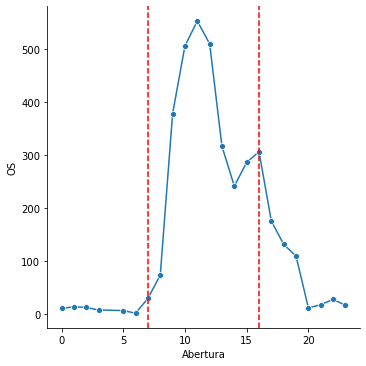

In [32]:
#Plota gráfico das OS abertas por horas. As linhas vermelhas indicam os limites do horário de trabalho dos técnicos
ax = snb.relplot(data = df2[['OS']].groupby(df2['Abertura'].dt.hour).count(),x='Abertura',y='OS',marker = 'o',kind ='line')
plt.axvline(16,0,linestyle = '--',color ='red')
plt.axvline(7,0,linestyle = '--',color ='red')

In [12]:
#Conta as OS agrupadas por equipamentos e seus patrimônios
df2[['Equipamento','Patrimônio','OS']].groupby(['Equipamento','Patrimônio']).count().sort_values('OS',ascending=False)

OS
Equipamento               Patrimônio     
Termodesinfectora         DT3083       14
Autoclave                 DT 5091      12
                          002731E      12
Tomógrafo Computadorizado 5410         11
Incubadora Neonatal       000502E       9
...                                    ..
Bomba de Infusão          002135E       1
                          002136E       1
                          002143M       1
                          002144E       1
Válvula de vácuo          HOBCFO-0001   1

[817 rows x 1 columns]

In [13]:
#Calcula e altera os valores de 'Tempo de OS'. A coluna passa a ser um timedelta
df['Tempo de OS'] = df['Fechamento'] - df['Abertura']
teste = df.loc[df['Abertura']>'2020-01-01']
teste

,OS,Unidade,Equipamento,Patrimônio,Nome,Abertura,Fechamento,Comentário,Situação,Tempo de OS,...,Tempo de execução,Tempo de espera,Tempo de espera considera Sexta,Auxiliar,Empresa ou Técnico,Mês de abertura,Mês de encerramento,Mês de execução,Sobra do mês,Observação
8470,31121.0,Bloco Cirúrgico 1º andar,Foco Cirúrgico de Teto,NaN,Marco Antônio,2020-01-01 09:24:24,2020-01-28 16:03:30,"FOCO NÃƒO LIGA, FAVOR AVALIAR",closed,27 days 06:39:06,...,03:00:00,1900-01-26 21:35:36,1900-01-26 21:35:36,NaN,NaN,1.0,1.0,1.0,NaN,0
8471,31122.0,CTI - 1,NaN,NaN,NaN,2020-01-02 07:40:39,2020-01-02 17:28:48,vÃ¡cuo do box 4 nÃ£o funciona.,closed,0 days 09:48:09,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
8472,31123.0,CTI - 2,Monitor Multiparâmetro Modular,000476E,EasyTech,2020-01-02 08:39:33,2020-04-15 11:45:01,Monitor nÃ£o liga AGUARDANDO EASYTECH,closed,104 days 03:05:28,...,1900-04-10 00:13:00,1900-01-01 02:18:27,1900-01-01 02:18:27,NaN,NaN,1.0,4.0,1.0,NaN,0
8473,31124.0,Clínica Cirúrgica 2º andar,NaN,NaN,Marcos Assis,2020-01-02 10:53:09,2020-01-15 16:52:00,InstalaÃ§Ã£o de 2 camas novas na enfermaria 211,closed,13 days 05:58:51,...,00:30:00,1900-01-04 00:36:51,1900-01-04 00:36:51,NaN,NaN,1.0,1.0,1.0,NaN,0
8474,31125.0,UTIN-CTI Neonatal,Monitor Multiparâmetro Modular,0002668E,Maurício,2020-01-02 14:20:53,2020-01-15 17:10:50,A TELA NÃƒO LIGA.,closed,13 days 02:49:57,...,01:00:00,1900-01-05 18:39:07,1900-01-05 18:39:07,NaN,NaN,1.0,1.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,35031.0,Raio-X,Raio-X Fixo,NaN,Lucas,2020-12-30 17:08:15,2021-01-04 10:38:16,"RX Shimadzu nÃ£o esta funcionando, favor verif...",closed,4 days 17:30:01,...,00:20:00,00:11:45,00:11:45,NaN,NaN,12.0,1.0,12.0,NaN,0
12199,35032.0,Bloco Obstétrico,Acessório: Cabo Placa de Bisturi,NaN,Wagner,2020-12-30 17:16:19,2021-01-04 12:01:59,"gentileza verificar ,funcionamento do cabo, o ...",closed,4 days 18:45:40,...,00:20:00,1900-01-04 15:37:41,1900-01-04 15:37:41,NaN,NaN,12.0,1.0,1.0,NaN,0
12200,35033.0,UPA/HOB,Cama Eletrônica,DM4985,Marcos Assis,2020-12-31 10:03:51,NaT,Segundo o enfermeiro a parte elÃ©trica da cama...,open,NaT,...,00:45:00,01:11:09,01:11:09,NaN,NaN,12.0,NaN,12.0,NaN,0
12201,35034.0,Clínica Médica,Ap Pa,PS2827,Interno,2020-12-31 11:43:24,NaT,Trata-se de um esfigmomanometro que a pera nÃ£...,open,NaT,...,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN


,OS
Abertura,
0,10
1,13
2,12
3,7
5,6
6,1
7,29
8,73
9,378


In [22]:
#Cria o df os_feriados com a lista das OS criadas em feriados nacionais
os_feriados = df[df['Abertura'].dt.date.isin(feriados['2020-01-01':'2020-12-31'])]

In [25]:
os_feriados[['OS']].groupby(df['Abertura'].dt.date).count()

,OS
Abertura,
2020-01-01,1
2020-02-25,7
2020-02-26,22
2020-04-10,3
2020-04-21,2
2020-05-01,3
2020-06-11,6
2020-09-07,14
2020-10-12,6


In [31]:
df.groupby(['Equipamento','Nome'])['Tempo de OS'].agg([lambda x:x.mean()]).sort_values('<lambda>',ascending = False).head(30)

,,<lambda>
Equipamento,Nome,
Homogeneizador,Vânio,616 days 10:11:38
Cabo extensor de ECG,Maurício,574 days 23:54:03
Acessório: Transdutor de Ultrassom,Marcos Assis,542 days 03:41:26
Acessório: Cabo para pinça bipolar,Adalberto,466 days 05:50:45
Oximetro de Pulso,Ênfase,445 days 11:44:45.333333336
Módulo: Bateria,Vânio,378 days 09:16:41.500000
Acessório: Transdutor Cadiotocógrafo,Maurício,373 days 22:52:28
Seladora,Adalberto,363 days 21:04:13
Ventilador pulmonar,WF Martins,318 days 00:50:11.333333332


<AxesSubplot:xlabel='Abertura'>

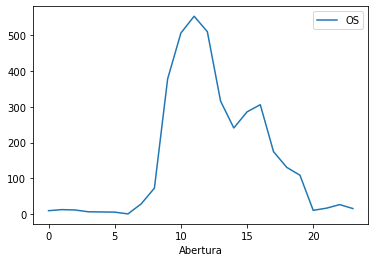

In [76]:
df2[['OS']].groupby(df2['Abertura'].dt.hour).count().plot()

In [41]:
#KPI 2020
nOS = df2.groupby(df2['Abertura'].dt.month)['OS'].count()
nOS

Abertura
1     381
2     305
3     294
4     259
5     297
6     271
7     307
8     357
9     353
10    283
11    293
12    333
Name: OS, dtype: int64

In [119]:
fechamento = (df['Situação'].loc[df['Situação']=='closed'].groupby([df['Abertura'].dt.year,df['Abertura'].dt.month]).count()/df['OS'].groupby([df['Abertura'].dt.year,df['Abertura'].dt.month]).count())*100
fechamento

Abertura  Abertura
2018.0    1.0          99.748111
          2.0          99.696049
          3.0          99.465241
          4.0          99.206349
          5.0          99.681529
          6.0          99.672131
          7.0          99.380805
          8.0          99.692308
          9.0          99.657534
          10.0        100.000000
          11.0        100.000000
          12.0         98.820059
2019.0    1.0          99.137931
          2.0          99.706745
          3.0          99.472296
          4.0          99.720670
          5.0          98.449612
          6.0          99.189189
          7.0          99.532710
          8.0          98.898072
          9.0          98.507463
          10.0         96.551724
          11.0         96.495957
          12.0         95.567867
2020.0    1.0          97.637795
          2.0          96.393443
          3.0          93.537415
          4.0          89.189189
          5.0          90.235690
          6.0          8

In [75]:
print(df2['OS'].loc[df2['Situação']=='open'])

8489     31150.0
8631     31332.0
8702     31405.0
8724     31428.0
8774     31478.0
          ...   
12193    35026.0
12194    35027.0
12196    35029.0
12200    35033.0
12201    35034.0
Name: OS, Length: 453, dtype: float64


In [107]:
df['Situação'].loc[(df['Situação']=='closed') & (df['Abertura'].dt.year==2018.0)].groupby(df2['Abertura'].dt.year).count()

Series([], Name: Situação, dtype: int64)